In [1]:
from WindPy import w
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
w.start()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2017 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

In [3]:
df = pd.read_excel(u'C:/Users/zhangyang01/Dropbox/嘉实/研究/场内ETF.xlsx')

In [4]:
df.head()

,代码,基金场内简称,跟踪指数代码,跟踪指数简称,标签
0,159901.SZ,深100ETF,399330.SZ,深证100,深证100
1,159902.SZ,中小板,399005.SZ,中小板指,中小板指
2,159903.SZ,深成ETF,399001.SZ,深证成指,深证成指
3,159905.SZ,深红利,399324.SZ,深证红利,分红频率和数量多的40只股票
4,159906.SZ,深成长,399326.SZ,成长40,深市具有良好成长性和行业代表的40只股票


In [5]:
code = df[u'代码'][0]

In [6]:
code

u'159901.SZ'

In [7]:
start_date, end_date = '2016-12-04', '2017-12-05'

In [10]:
data = w.wsd(code, 'volume', start_date, end_date)

In [14]:
series = pd.Series(data.Data[0], index=data.Times)

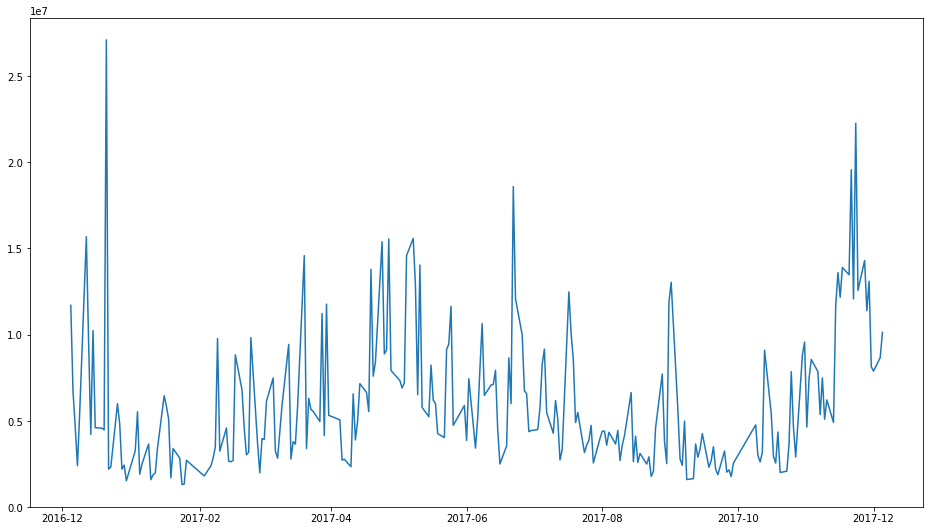

In [17]:
plt.figure(figsize=(16, 9))
plt.plot(series)

In [18]:
df['1M volume'], df['3M volume'], df['6M volume'], df['1Y volume'] = 0, 0, 0, 0

In [20]:
df = df.set_index(u'代码')

In [28]:
# vdf = pd.DataFrame(columns=df.index)
# for code in df.index:
#     print code
#     data = w.wsd(code, 'volume', start_date, end_date)
#     vdf[code] = data.Data[0]
# vdf.index = data.Times

In [29]:
# vdf.to_excel('./data/volume.xlsx')

In [26]:
vdf = pd.read_excel('./data/volume.xlsx', index_col=0)

In [44]:
for code in df.index:
#     print code
    df['1M volume'][code] = vdf[code][-20:].sum()
    df['3M volume'][code] = vdf[code][-60:].sum()
    df['6M volume'][code] = vdf[code][-121:].sum()
    df['1Y volume'][code] = vdf[code].sum()

C:\Users\zhangyang01\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\zhangyang01\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\zhangyang01\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/p

In [45]:
df.to_excel('./data/etf.xlsx')